# EXPLORE DATA ABOUT STOKE 

## 1. BUSINESS PROBLEM

### STROKE PREDICTION
#### To Do :
Cleaning dataset for classification
Some analysis and statistics
ML, ANN
#### ABOUT DATA :
Stroke is a medical condition in which poor blood flow to the brain causes cell death. There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both cause parts of the brain to stop functioning properly. According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## 2. EXPLORE DATA

### 2.1. INPUT DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = '/Users/mac/Desktop/Project/stoke/healthcare-dataset-stroke-data.csv'

df = pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df = df.drop('id', axis=1)

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df[['age','avg_glucose_level','bmi','stroke']].describe()

,age,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,106.147677,28.893237,0.048728
std,22.612647,45.283560,7.854067,0.215320
min,0.080000,55.120000,10.300000,0.000000
25%,25.000000,77.245000,23.500000,0.000000
50%,45.000000,91.885000,28.100000,0.000000
75%,61.000000,114.090000,33.100000,0.000000
max,82.000000,271.740000,97.600000,1.000000


In [4]:
df_unique = df[['gender','ever_married','work_type','Residence_type','smoking_status']]

In [5]:
unique = [df_unique[col].unique() for col in df_unique.columns]
print(unique)

[array(['Male', 'Female', 'Other'], dtype=object), array(['Yes', 'No'], dtype=object), array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object), array(['Urban', 'Rural'], dtype=object), array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)]


In [6]:
df.shape

(5110, 11)

In [7]:
# Data Analysis Libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, classification_report,confusion_matrix

# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

# İgnore Warnings
import warnings
warnings.filterwarnings("ignore")


2024-04-27 21:31:44.410909: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 2.2. CLEAN DATA

In [8]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
## clean gender

df['gender_map'] = df['gender'].replace({'Male':0,'Female':1,'Other':2})
df = df.drop('gender',axis = 1)
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_map
0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0
1,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1
2,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0
3,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1
4,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1


In [10]:
## clean ever_married

df['ever_married_map'] = df['ever_married'].replace({'Yes':1,'No': 0})
df = df.drop('ever_married',axis = 1)
df.head()

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_map,ever_married_map
0,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1,0,1
1,61.0,0,0,Self-employed,Rural,202.21,NaN,never smoked,1,1,1
2,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1,0,1
3,49.0,0,0,Private,Urban,171.23,34.4,smokes,1,1,1
4,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,1,1


In [11]:
## clean work_type

df['work_type_map'] = df['work_type'].replace({'Private':1,'Self-employed': 0,'Govt_job':2,'children':3,'Never_worked':4})
df = df.drop('work_type',axis = 1)
df.head()

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_map,ever_married_map,work_type_map
0,67.0,0,1,Urban,228.69,36.6,formerly smoked,1,0,1,1
1,61.0,0,0,Rural,202.21,NaN,never smoked,1,1,1,0
2,80.0,0,1,Rural,105.92,32.5,never smoked,1,0,1,1
3,49.0,0,0,Urban,171.23,34.4,smokes,1,1,1,1
4,79.0,1,0,Rural,174.12,24.0,never smoked,1,1,1,0


In [12]:
## clean Residence_type

df['Residence_type_map'] = df['Residence_type'].replace({'Urban':1,'Rural': 0})
df = df.drop('Residence_type',axis = 1)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_map,ever_married_map,work_type_map,Residence_type_map
0,67.0,0,1,228.69,36.6,formerly smoked,1,0,1,1,1
1,61.0,0,0,202.21,NaN,never smoked,1,1,1,0,0
2,80.0,0,1,105.92,32.5,never smoked,1,0,1,1,0
3,49.0,0,0,171.23,34.4,smokes,1,1,1,1,1
4,79.0,1,0,174.12,24.0,never smoked,1,1,1,0,0


In [13]:
## clean smoking_status

df['smoking_status_map'] = df['smoking_status'].replace({'formerly smoked':1,'never smoked': 0,'smokes':2,'Unknown':3})
df = df.drop('smoking_status',axis = 1)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_map,ever_married_map,work_type_map,Residence_type_map,smoking_status_map
0,67.0,0,1,228.69,36.6,1,0,1,1,1,1
1,61.0,0,0,202.21,NaN,1,1,1,0,0,0
2,80.0,0,1,105.92,32.5,1,0,1,1,0,0
3,49.0,0,0,171.23,34.4,1,1,1,1,1,2
4,79.0,1,0,174.12,24.0,1,1,1,0,0,0


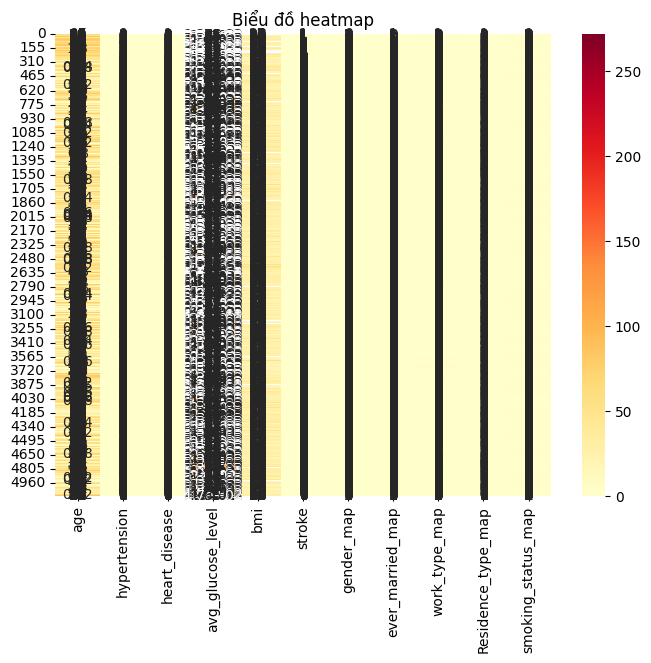

In [15]:
# Vẽ biểu đồ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap='YlOrRd')
plt.title('Biểu đồ heatmap')
plt.show()

#### Rõ ràng chất lượng dữ liệu trong 5111 bản ghi đầy đủ không bị thiếu ở cột thông tin nào, giúp việc đánh giá và mô hình hoá dữ liệu tốt hơn

### 2.3. VIZUALIZE DATA

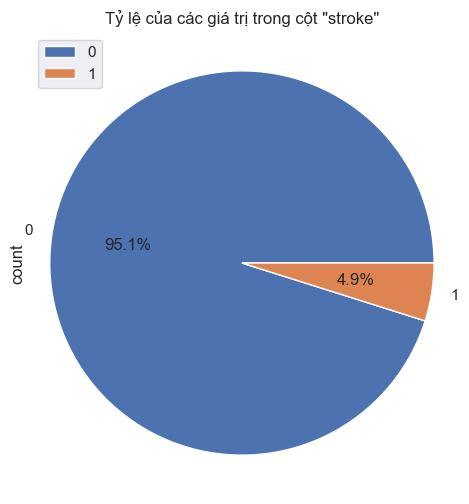

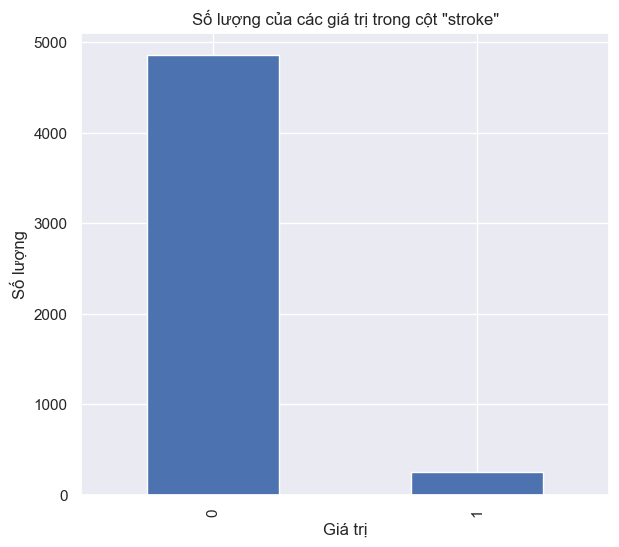

In [46]:
## Xem số lượng người chết vì đột quỵ là bao nhiêu

a = df['stroke'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
a.plot(kind='pie', autopct='%1.1f%%')
plt.title('Tỷ lệ của các giá trị trong cột "stroke"')
plt.axis('equal')
plt.legend(labels=a.index, loc='upper left')
plt.show()

# Vẽ biểu đồ bar
plt.subplot(1,2,2)
a.plot(kind='bar')
plt.title('Số lượng của các giá trị trong cột "stroke"')
plt.xlabel('Giá trị')
plt.ylabel('Số lượng')
plt.show()

## Trong tập mẫu có tới 4.9 % bị đột quỵ do nhiều nguyên nhân khác nhau. Cần đào sâu vấn đề này và tìm hiểu rõ nguyên nhân dựa vào các biến trong tập mẫu

In [47]:
df_anla  = df[df['stroke'] == 1]
df_anla.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_map,ever_married_map,work_type_map,Residence_type_map,smoking_status_map
0,67.0,0,1,228.69,36.6,1,0,1,1,1,1
1,61.0,0,0,202.21,NaN,1,1,1,0,0,0
2,80.0,0,1,105.92,32.5,1,0,1,1,0,0
3,49.0,0,0,171.23,34.4,1,1,1,1,1,2
4,79.0,1,0,174.12,24.0,1,1,1,0,0,0


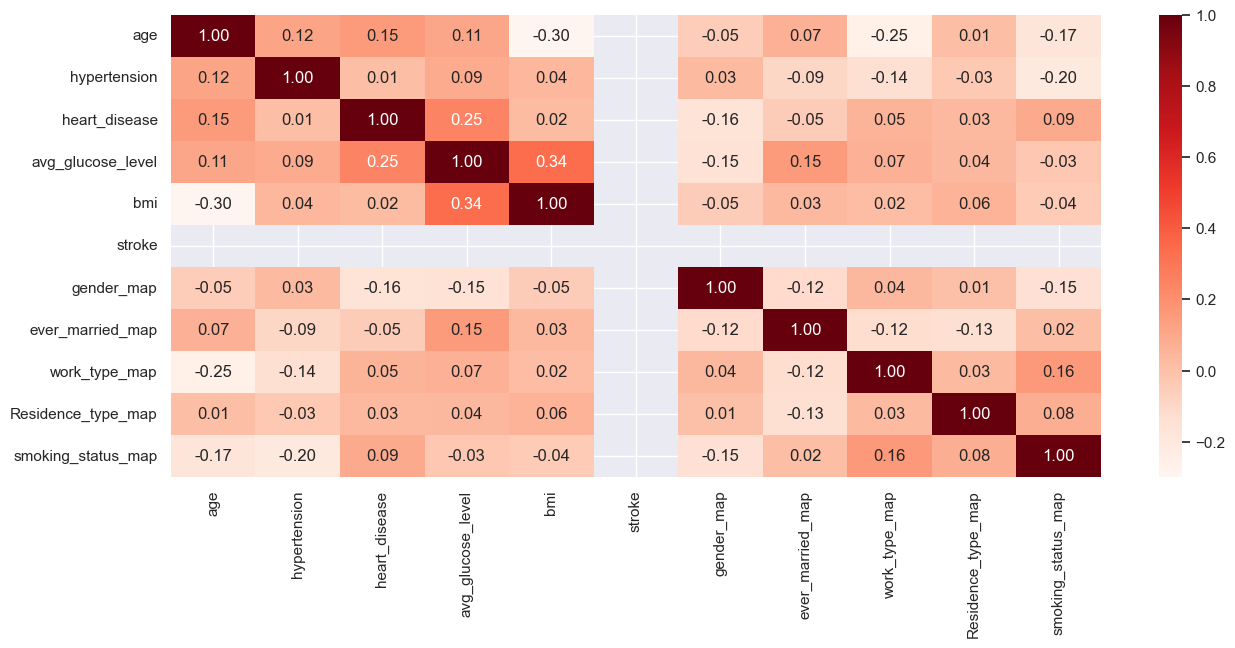

In [48]:
# xem độ tương quan giữa các chỉ số

corr = df_anla.corr()
sns.set(rc={'figure.figsize': (15, 6)})
sns.heatmap(corr, cmap="Reds", annot=True, fmt=".2f")
plt.show()

#### 1. Biến độc lập có mối tương quan mạnh nhất với biến stroke là:

- "age": Có mối tương quan dương (0.34) với stroke, điều này cho thấy khi tuổi tăng, nguy cơ đột quỵ cũng tăng.
- "avg_glucose_level": Cũng có mối tương quan dương (0.34) với stroke, chỉ ra rằng mức glucose máu cao làm tăng nguy cơ đột quỵ.
- "bmi": Tương tự, BMI có mối tương quan dương (0.34) với stroke, có nghĩa là chỉ số BMI cao làm tăng nguy cơ đột quỵ.
#### 2. Các biến độc lập có mối tương quan trung bình với biến stroke:

- "hypertension": Có mối tương quan dương (0.04) với stroke, tức là bệnh tăng huyết áp làm tăng nguy cơ đột quỵ.
- "heart_disease": Có mối tương quan dương (0.02) với stroke, cho thấy bệnh tim cũng là yếu tố nguy cơ của đột quỵ.
#### 3. Các biến độc lập có mối tương quan yếu với biến stroke:

- "gender_map", "ever_married_map", "work_type_map", "Residence_type_map", "smoking_status_map": Các biến này đều có mối tương quan dưới 0.2 với biến stroke, cho thấy ảnh hưởng của các yếu tố xã hội, nhân khẩu học đến nguy cơ đột quỵ là không quá mạnh.

Nhìn chung, các yếu tố như tuổi, mức glucose máu, chỉ số BMI là những biến độc lập có mối tương quan mạnh nhất với biến phụ thuộc (stroke), cho thấy chúng là những yếu tố nguy cơ chính đối với đột quỵ. Các yếu tố khác như tăng huyết áp, bệnh tim cũng là những yếu tố cần lưu ý, mặc dù có mức độ tương quan thấp hơn.

### Xem xét phân bố biến độc lập Age, Avg_glucose_level, bmt trong trường hợp bị đột quỵ

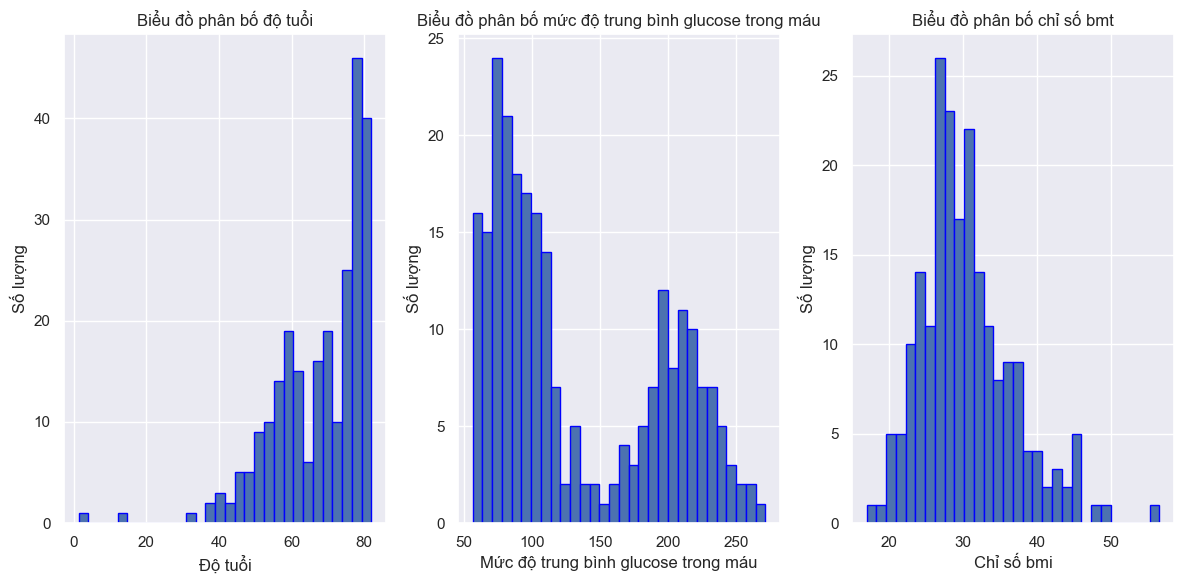

In [49]:
# dữ liệu tuổi

age = df_anla['age']

# dữ liệu avg_glucose_level

avg_glucose_level = df_anla['avg_glucose_level']

# dữ liệu bmi

bmi = df_anla['bmi']

# vẽ biểu đồ 

# Tạo subplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)  
plt.hist(age,bins = 30, edgecolor='blue')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng')
plt.title('Biểu đồ phân bố độ tuổi')

plt.subplot(1, 3, 2)  
plt.hist(avg_glucose_level,bins = 30, edgecolor='blue')
plt.xlabel('Mức độ trung bình glucose trong máu')
plt.ylabel('Số lượng')
plt.title('Biểu đồ phân bố mức độ trung bình glucose trong máu')

plt.subplot(1, 3, 3)  
plt.hist(bmi,bins = 30, edgecolor='blue')
plt.xlabel('Chỉ số bmi')
plt.ylabel('Số lượng')
plt.title('Biểu đồ phân bố chỉ số bmt')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


#### Rõ ràng ta nhận thấy được độ tuổi trên 75 tuổi có số lượng người đột quỵ cao nhất và đang có xu hướng trẻ hoá, chỉ số bmt ở ngưỡng 30 có số lượng người tư vong cao cần chú ý chỉ số này để không bị đột quy. Về mức độ trung bình glucose trong máu ở mức 80-100 và 200-220 có lượng người đột quy cao trong tập người đã bị đột quỵ.

## B. Xét toàn bộ tập dữ liệu

In [50]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_map,ever_married_map,work_type_map,Residence_type_map,smoking_status_map
0,67.0,0,1,228.69,36.6,1,0,1,1,1,1
1,61.0,0,0,202.21,NaN,1,1,1,0,0,0
2,80.0,0,1,105.92,32.5,1,0,1,1,0,0
3,49.0,0,0,171.23,34.4,1,1,1,1,1,2
4,79.0,1,0,174.12,24.0,1,1,1,0,0,0


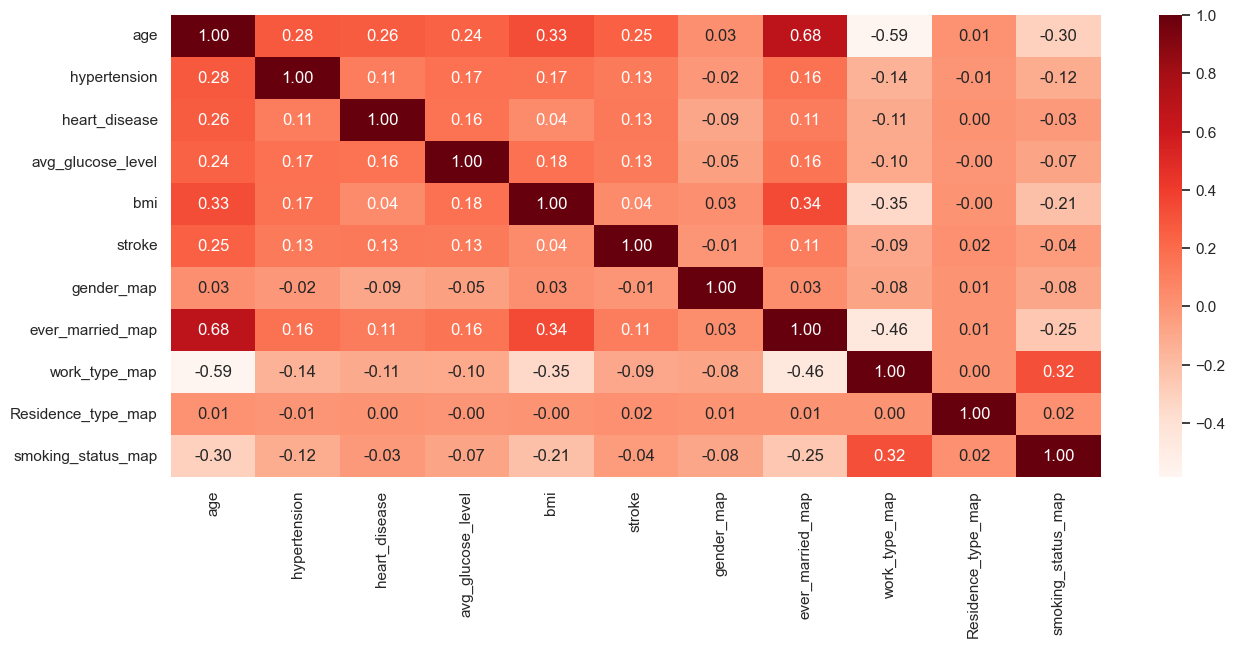

In [51]:
# xem độ tương quan giữa các chỉ số

corr_all = df.corr()
sns.set(rc={'figure.figsize': (15, 6)})
sns.heatmap(corr_all, cmap="Reds", annot=True, fmt=".2f")
plt.show()

##### Age (tuổi): Có mối tương quan dương mạnh với biến stroke. Điều này cho thấy khi tuổi tăng, nguy cơ đột quỵ cũng tăng. Đây là một yếu tố quan trọng trong việc đánh giá nguy cơ đột quỵ.

##### Hypertension (tăng huyết áp): Có mối tương quan dương với biến stroke, tuy nhiên mức độ tương quan không cao. Điều này cho thấy tăng huyết áp có thể có ảnh hưởng đến nguy cơ đột quỵ, nhưng không phải là yếu tố chính.

##### Heart_disease (bệnh tim): Có mối tương quan dương với biến stroke, tuy nhiên mức độ tương quan cũng không cao. Điều này chỉ ra rằng bệnh tim cũng có ảnh hưởng đến nguy cơ đột quỵ, nhưng có thể không là yếu tố chính.

##### Avg_glucose_level (mức glucose trung bình): Có mối tương quan dương mạnh với biến stroke. Điều này cho thấy mức glucose máu cao là một yếu tố nguy cơ đối với đột quỵ. Đây là một yếu tố quan trọng khác cần xem xét trong việc đánh giá nguy cơ đột quỵ.

##### BMI: Cũng có mối tương quan dương mạnh với biến stroke. Chỉ số BMI cao là một yếu tố nguy cơ đối với đột quỵ. Đây là một yếu tố khác cần lưu ý khi đánh giá nguy cơ đột quỵ.

### >>>Từ biểu đồ heatmap, ta có thể thấy rõ mối quan hệ giữa các biến số và biến stroke. Tuy mức độ tương quan có thể khác nhau, nhưng các yếu tố như tuổi, mức glucose máu và chỉ số BMI đều có mối quan hệ mạnh với nguy cơ đột quỵ.

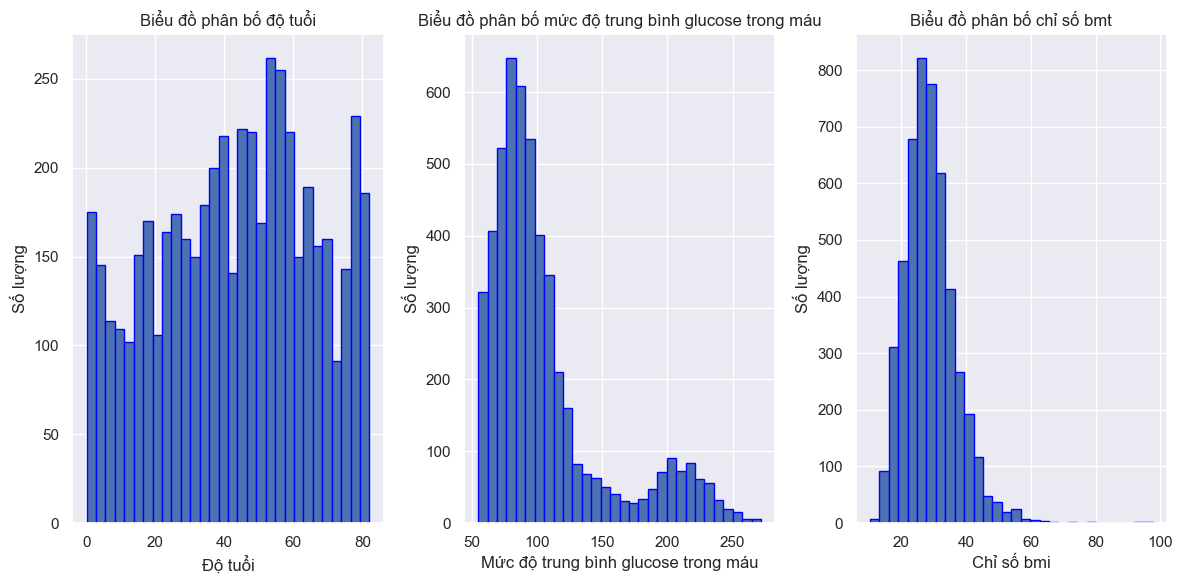

In [52]:
# dữ liệu tuổi

age = df['age']

# dữ liệu avg_glucose_level

avg_glucose_level = df['avg_glucose_level']

# dữ liệu bmi

bmi = df['bmi']

# vẽ biểu đồ 

# Tạo subplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)  
plt.hist(age,bins = 30, edgecolor='blue')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng')
plt.title('Biểu đồ phân bố độ tuổi')

plt.subplot(1, 3, 2)  
plt.hist(avg_glucose_level,bins = 30, edgecolor='blue')
plt.xlabel('Mức độ trung bình glucose trong máu')
plt.ylabel('Số lượng')
plt.title('Biểu đồ phân bố mức độ trung bình glucose trong máu')

plt.subplot(1, 3, 3)  
plt.hist(bmi,bins = 30, edgecolor='blue')
plt.xlabel('Chỉ số bmi')
plt.ylabel('Số lượng')
plt.title('Biểu đồ phân bố chỉ số bmt')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


- Trong tập dữ liệu độ tuổi được phân bố nhiều nhất là 55-60 tuổi

- Mức dộ trung bình glucose trong máu phân bố chủ yếu bên tay trái chủ yếu ở 80-100 mg/dL (Ngưỡng cho phép đường huyết lúc đói: < 100 mg/dL (< 5,6 mmol/l). 

- Chỉ số bmi của người bình thường là 18.5 đến 25, trong biểu đồ phân bố 28-30 tức vượt ngưỡng cho phép

## 4. ML MODELLING

## feature selection

- dataset: df
- X: df(feature)
- y: df(predict)

### X,y -> X_train, y_train, X_valid, y_valid

In [53]:
X = df[['age','avg_glucose_level','bmi']]
y = df['stroke']

X.head()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [54]:
median_values = X.median()
median_values_y = y.median()
# Thay thế NaN bằng giá trị trung vị
df_X = X.fillna(median_values)
df_y = y.fillna(median_values_y)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid =train_test_split(df_X,df_y, train_size = 0.8, test_size = 0.2,random_state = 0)

In [56]:
y_valid.head()

42      1
380     0
3524    0
352     0
4927    0
Name: stroke, dtype: int64

In [57]:
X.shape

(5110, 3)

In [58]:
X_train.shape

(4088, 3)

In [75]:
y_valid.shape

(1022,)

## Training ML model

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 1)
#fit training data input model
dt_model.fit(X_train,y_train)
# Dự đoán giá trị cho dữ liệu kiểm tra
y_pred = dt_model.predict(X_valid)
# check dự đoán và dữ liệu thực
pd.DataFrame({'y': y_valid, 'y_pred': y_pred})

,y,y_pred
42,1,0.0
380,0,0.0
3524,0,0.0
352,0,0.0
4927,0,0.0
...,...,...
472,0,0.0
4446,0,0.0
660,0,0.0
57,1,0.0


In [69]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf_model = RandomForestClassifier(random_state = 1)
rf_model.fit(X_train, y_train)
rf_model_pred = rf_model.predict(X_valid)
rf_model_pred.shape

(1022,)

### Model Evaluation

In [71]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Tính toán Confusion matrix
cm = confusion_matrix(y_valid, rf_model_pred)
print("Confusion Matrix:")
print(cm)

# Tính toán classification report
cr = classification_report(y_valid, rf_model_pred)
print("Classification Report:")
print(cr)

# Tính toán độ chính xác
accuracy = accuracy_score(y_valid, rf_model_pred)
print("Accuracy:", accuracy)


Confusion Matrix:
[[965   3]
 [ 53   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.25      0.02      0.03        54

    accuracy                           0.95      1022
   macro avg       0.60      0.51      0.50      1022
weighted avg       0.91      0.95      0.92      1022

Accuracy: 0.9452054794520548


Trong Confusion Matrix (ma trận nhầm lẫn), các giá trị được sắp xếp như sau:

- True Negative (TN): 956 (số lượng mẫu được dư đoán đúng là 0 và thực tế là 0)
- False Negative (FN): 53 (số lượng mẫu được dự đoán sai là 0 nhưng thực tế là 1)
- True Positive (TP): 3 (số lượng mẫu được dự đoán đúng là 1 nhưng thực tế là 1)
- False Positive (FP): 1 (số lượng mẫu được dự đoán sai là 1 nhưng thực tế là 0)

Trong classification report, các thông số được tính toán cho từng lớp như sau:
 
- Precision: Độ chính xác của dự đoán cho từng lớp. Precision được tính bằng công thức TP / (TP + FP).

  + Đối với lớp 0, độ chính xác là 0.95 (956 / (956 + 1)),
  + Đối với lớp 1, độ chính xác là 0.25 (3 / (3+1)).
- Recall: Tỷ lệ mẫu dự đoán chính xác cho từng lớp. Recall được tính bằng công thức TP / (TP + FN).

  + Đối với lớp 0, tỷ lệ dự đoán chính xác là 0.97 (956 / (956 + 1)),
  + Đối với lớp 1, tỷ lệ dự đoán chính xác là 0.15 (3 / (3 + 53)).
- F1-score: Trung bình điều hòa giữa precision và recall cho từng lớp. F1-score được tính bằng công thức 2 * (Precision * Recall) / (Precision + Recall).

  + Đối với lớp 0, F1-score là 0.97,
  + Đối với lớp 1, F1-score là 0.03. Support: Số lượng mẫu trong từng lớp. Lớp 0 có 968 mẫu, và lớp 1 có 54 mẫu. Accuracy: 0.9452054794520548
Độ chính xác (accuracy) được tính bằng tỷ lệ giữa số lượng dự đoán đúng và tổng số điểm dữ liệu. Trong trường hợp này, độ chính xác là 0.9452054794520548, tức là có khoảng 94.52% dự đoán đúng trên tổng số 1022 điểm dữ liệu kiểm tra.
 

In [74]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Tính toán Confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(cm)

# Tính toán classification report
cr = classification_report(y_valid, y_pred)
print("Classification Report:")
print(cr)

# Tính toán độ chính xác
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)


Confusion Matrix:
[[938  30]
 [ 46   8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       968
           1       0.21      0.15      0.17        54

    accuracy                           0.93      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.91      0.93      0.92      1022

Accuracy: 0.9256360078277887


Trong Confusion Matrix (ma trận nhầm lẫn), các giá trị được sắp xếp như sau:

- True Negative (TN): 938 (số lượng mẫu được dự đoán đúng là 0 và thực tế cũng là 0).
- False Positive (FP): 30 (số lượng mẫu được dự đoán sai là 1 nhưng thực tế là 0).
- False Negative (FN): 46 (số lượng mẫu được dự đoán sai là 0 nhưng thực tế là 1).
- True Positive (TP): 8 (số lượng mẫu được dự đoán đúng là 1 và thực tế cũng là 1).

Trong classification report, các thông số được tính toán cho từng lớp như sau:

- Precision: Độ chính xác của dự đoán cho từng lớp. Precision được tính bằng công thức TP / (TP + FP). 
  + Đối với lớp 0, độ chính xác là 0.95 (938 / (938 + 30)), 
  + Đối với lớp 1, độ chính xác là 0.21 (8 / (8 + 46)).
- Recall: Tỷ lệ mẫu dự đoán chính xác cho từng lớp. Recall được tính bằng công thức TP / (TP + FN). 
  + Đối với lớp 0, tỷ lệ dự đoán chính xác là 0.97 (938 / (938 + 30)),  
  + Đối với lớp 1, tỷ lệ dự đoán chính xác là 0.15 (8 / (8 + 46)).
- F1-score: Trung bình điều hòa giữa precision và recall cho từng lớp. F1-score được tính bằng công thức 2 * (Precision * Recall) / (Precision + Recall). 
  + Đối với lớp 0, F1-score là 0.96, 
  + Đối với lớp 1, F1-score là 0.17.
Support: Số lượng mẫu trong từng lớp. Lớp 0 có 968 mẫu, và lớp 1 có 54 mẫu.
Accuracy: 0.9256360078277887

- Độ chính xác (accuracy) được tính bằng tỷ lệ giữa số lượng dự đoán đúng và tổng số điểm dữ liệu. Trong trường hợp này, độ chính xác là 0.9256, tức là có khoảng 92.56% dự đoán đúng trên tổng số 1022 điểm dữ liệu kiểm tra.

### Đánh giá mô hình:

Confusion matrix cho thấy rằng mô hình có khả năng dự đoán chính xác cho lớp 0 (nhãn 0) với độ chính xác cao (938/968) và số lượng dự đoán sai cho lớp 1 (nhãn 1) là khá cao (46/54).

Precision cho lớp 0 là cao (0.95), trong khi precision cho lớp 1 là thấp (0.21), cho thấy mô hình có khả năng dự đoán chính xác cho lớp 0 nhưng không hiệu quả cho lớp 1.
Recall cho cả hai lớp đều thấp. Điều này cho thấy mô hình có xu hướng bỏ sót nhiều mẫu thuộc lớp 1 (thấp recall) và dự đoán sai nhiều mẫu thuộc lớp 1 thành mẫu thuộc lớp 0 (thấp recall).

F1-score cho lớp 0 là cao (0.96), trong khi F1-score cho lớp 1 là thấp (0.17), đồng thời, đánh giá trung bình F1-score (macro avg và weighted avg) cũng không cao (0.57 và 0.92), cho thấy mô hình không đạt hiệu suất tốt cho cả hai lớp.
Tuy mô hình có độ chính xác tổng thể là 0.9256, nhưng điều này chủ yếu đến từ việc dự đoán chính xác cho lớp 0, trong khi độ chính xác cho lớp 1 rất thấp.

Tóm lại, mô hình có hiệu suất tốt trong việc dự đoán cho lớp 0 (nhãn 0) nhưng không hiệu quả cho lớp 1 (nhãn 1). Cần tiếp tục cải thiện mô hình để đạt được hiệu suất tốt đồng thời cho cả hai lớp.